<a href="https://colab.research.google.com/github/UCDAyoung/DataAnalysisProgramming/blob/main/hwOfLecture4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Cars93 data
In this lab, we would like to explore data about 93 number of vehicles.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,4,1.8,140.0,6300.0,2890.0,Yes,13.2,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,6,3.2,200.0,5500.0,2335.0,Yes,18.0,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,6,2.8,172.0,5500.0,2280.0,Yes,16.9,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,6,NaN,172.0,5500.0,2535.0,NaN,21.1,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,4,3.5,208.0,5700.0,2545.0,Yes,21.1,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i


# Matplotlib
Please refer the [official doc](https://matplotlib.org/) or following [article](https://www.machinelearningplus.com/plots/matplotlib-tutorial-complete-guide-python-plot-examples/) for further detailed tricks.

**[TODO]** Draw *pie chart* of `Type` (hint, refer pandas'  [`.value_counts`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) method and the [article](https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f) about *pie chart*).

Midsize    22
Small      20
Compact    16
Sporty     12
Large      11
Van         9
Name: Type, dtype: int64


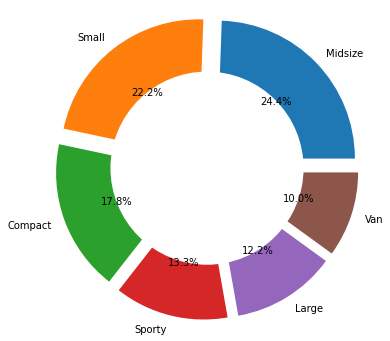

In [107]:
typeCount = df['Type'].value_counts()
print(typeCount)
fig, ax = plt.subplots(figsize=(6,6))
label = typeCount.index
size = typeCount.values
pie = ax.pie(size, 
       explode=(0.1,0.1,0.1,0.1,0.1,0.1) ,  #퍼진정도 
       labels = label,                      #라벨       
       autopct = '%1.1f%%',
       )

#draw white circle in the middle
center_circle = plt.Circle((0,0),0.7,fc='white')
plt.gca().add_artist(center_circle)
plt.axis('equal')
# ax = fig.add_subplot() #프레임 생성
# sum_pct = 0 ## 백분율 초기값
# frequency = [24.4,22.2,10,12.2,13.3,17.8]
# for i,l in enumerate(label):
#     ang1, ang2 = pie[0][i].theta1, pie[0][i].theta2 ## 각1, 각2
#     r = pie[0][i].r ## 원의 반지름
    
#     x = ((r+0.7)/2)*np.cos(np.pi/180*((ang1+ang2)/2)) ## 정중앙 x좌표
#     y = ((r+0.7)/2)*np.sin(np.pi/180*((ang1+ang2)/2)) ## 정중앙 y좌표
#     total = np.sum(frequency)
#     sum_pct = 0
#     if i < len(label) - 1:
#         sum_pct += float(f'{frequency[i]/total*100:.2f}') ## 백분율을 누적한다.
#         ax.text(x,y,f'{frequency[i]/total*100:.2f}%',ha='center',va='center') ## 백분율 텍스트 표시
#     else: ## 총합을 100으로 맞추기위해 마지막 백분율은 100에서 백분율 누적값을 빼준다.
#         ax.text(x,y,f'{100-sum_pct:.2f}%',ha='center',va='center')

plt.show()

# Seaborn

Please refer the [official doc](https://seaborn.pydata.org/).

**[TODO]** Plot *boxplot* which comparing the `Price` according to `Type`. The plot must satisify following conditions.
 * nested grouping within additional categorical variable, `Origin`
 * using `Greys` color palette


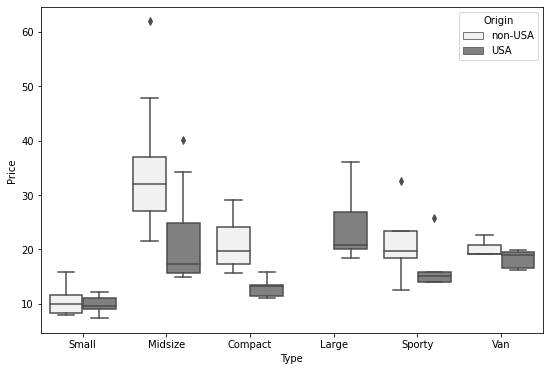

In [112]:
fig, ax = plt.subplots(figsize=(9,6))
sns.boxplot(x='Type',y='Price',hue='Origin',data = df,color='gray')
plt.show()

**[TODO]** Plot *pair plot*. The plot must satisify following conditions.
* Target variables are `Price`, `MPG.city`,	`MPG.highway`, `Rev.per.mile`.
* **[Advanced and Optional]** For the non-diagonal plots, add text with pearson's correlation value. (hint, you should add text manually using iteration)

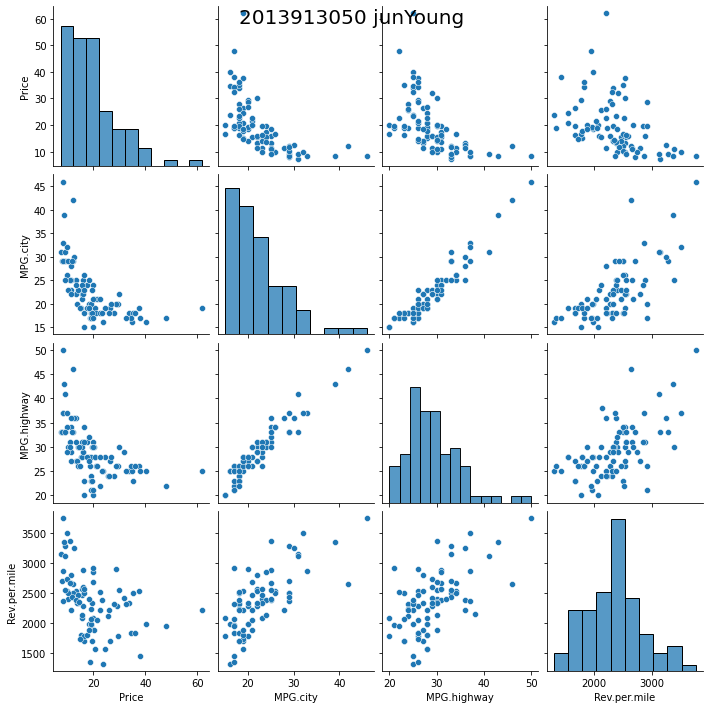

In [134]:
targetVar = ['Price', 'MPG.city', 'MPG.highway', 'Rev.per.mile']             

g = sns.pairplot(df,x_vars=targetVar,y_vars=targetVar)
g.fig.suptitle('2013913050 junYoung ', verticalalignment='top', fontsize=20)
# corrValue = g.corr(method='pearson')
# for i, (ax, cv) in enumerate(zip(g.axes.flat, corrValue.flatten())):  
#   print(i)
  # i.set_titel((ax,cv))
  # i.text(0.85, 0.85,'Text Here', fontsize=9)
plt.show()

# Plotly

**[TODO]** Plot *density contour plot* and deploy the dashboard.
* The *density contour plot* should show relationship between `Price` and user choosen variable.

(please refer [official doc](https://plotly.com/python/2d-histogram-contour/) about *density contour plot*)


In [135]:
# install packages
!pip install dash
!pip install jupyter_dash

     |████████████████████████████████| 7.3 MB 5.3 MB/s 
     |████████████████████████████████| 23.9 MB 1.7 MB/s 
     |████████████████████████████████| 357 kB 47.1 MB/s 
  Created wheel for dash-core-components: filename=dash_core_components-2.0.0-py3-none-any.whl size=3821 sha256=52b7aad73b26c4dc7d8caf14a53fc68a2301f5079b37bd2da294b3d8f0fc7681
  Stored in directory: /root/.cache/pip/wheels/00/f9/c7/1a6437d794ed753ea9bc9079e761d4fc803a1f1f5d3697b9ec
  Created wheel for dash-html-components: filename=dash_html_components-2.0.0-py3-none-any.whl size=4089 sha256=64af26360afcd3b86c4ff07ddfcec7bd9d18b1314142fccd1134e652d62e722a
  Stored in directory: /root/.cache/pip/wheels/ec/6b/81/05aceabd8b27f724e2c96784016287cc1bfbc349ebfda451de
  Created wheel for dash-table: filename=dash_table-5.0.0-py3-none-any.whl size=3911 sha256=4c0e302d9cda46a562fa9cdf671ead83c1ede75618e8459e5d38aaf496c03460
  Stored in directory: /root/.cache/pip/wheels/85/5d/4e/7c276b57992951dbe770bf5caad6448d0539c510663aef

In [190]:
import dash
from dash import html
import plotly.graph_objects as go
from dash import dcc
import plotly.express as px
from dash.dependencies import Input, Output

from jupyter_dash import JupyterDash



# Load Dash App
app = JupyterDash()

# Define App
app.layout = html.Div(id = 'parent',
                      children = [html.H1(id = 'H1', children = 'Cas93 Dashboard',
                                          style = {'textAlign':'center',\
                                                   'marginTop':40,
                                                   'marginBottom':40}),
                                  dcc.Dropdown(id = 'dropdown',
                                               options= [ {'label': 'MPG.city', 'value': 'city'},
                                                          {'label': 'MPG.highway', 'value': 'highway'},
                                                          {'label': 'Rev.per.mile', 'value': 'rev'} ],
                                                value = 'city'),
                                  dcc.Graph(id = 'plot')
                                  ])

# Define callback decorator and it's function    
@app.callback(Output(component_id='plot', component_property= 'figure'),
              [Input(component_id='dropdown', component_property= 'value')])

def graph_update(dropdown_value):
    print(dropdown_value)    
    df = px.data.tips()
    fig = px.density_contour(df,x="Price", y='{}'.format(dropdown_value), marginal_x="histogram", marginal_y="histogram")
    # fig.update_layout(title = "me",
    #                   xaxis_title = "Price",
    #                   yaxis_title = "Date")
    fig.update_traces(contours_coloring="fill", contours_showlabels=True)
    fig.show()
    return fig  

if __name__ == '__main__': 
    app.run_server()

Dash app running on:


<IPython.core.display.Javascript object>